In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('data/df_w1_stat.csv')

In [64]:
df.shape

(1460, 81)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [66]:
dicionario = open('data/df_w1_stat_descricao_colunas.txt', 'r')
content = dicionario.read()
print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [67]:
df_filter = df[["SalePrice",
"OverallQual",
"OverallCond",
"BedroomAbvGr",
"TotRmsAbvGrd",
"GrLivArea",
"TotalBsmtSF",
"YearBuilt",
"MSZoning",
"Utilities",
"BldgType"]]

In [68]:
df_filter

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam
1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam
1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam
1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam


In [69]:
df_filter.isnull().sum()

SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

In [70]:
# Alguns valores descritivos
print(f"Média de preço de vendas: {df_filter['SalePrice'].mean().round(2)}")
print(f"Mediana de preço de vendas: {df_filter['SalePrice'].median().round(2)}")
print(f"Moda de preço de vendas: {df_filter['SalePrice'].mode().round(2)}")

Média de preço de vendas: 180921.2
Mediana de preço de vendas: 163000.0
Moda de preço de vendas: 0    140000
Name: SalePrice, dtype: int64


<AxesSubplot: >

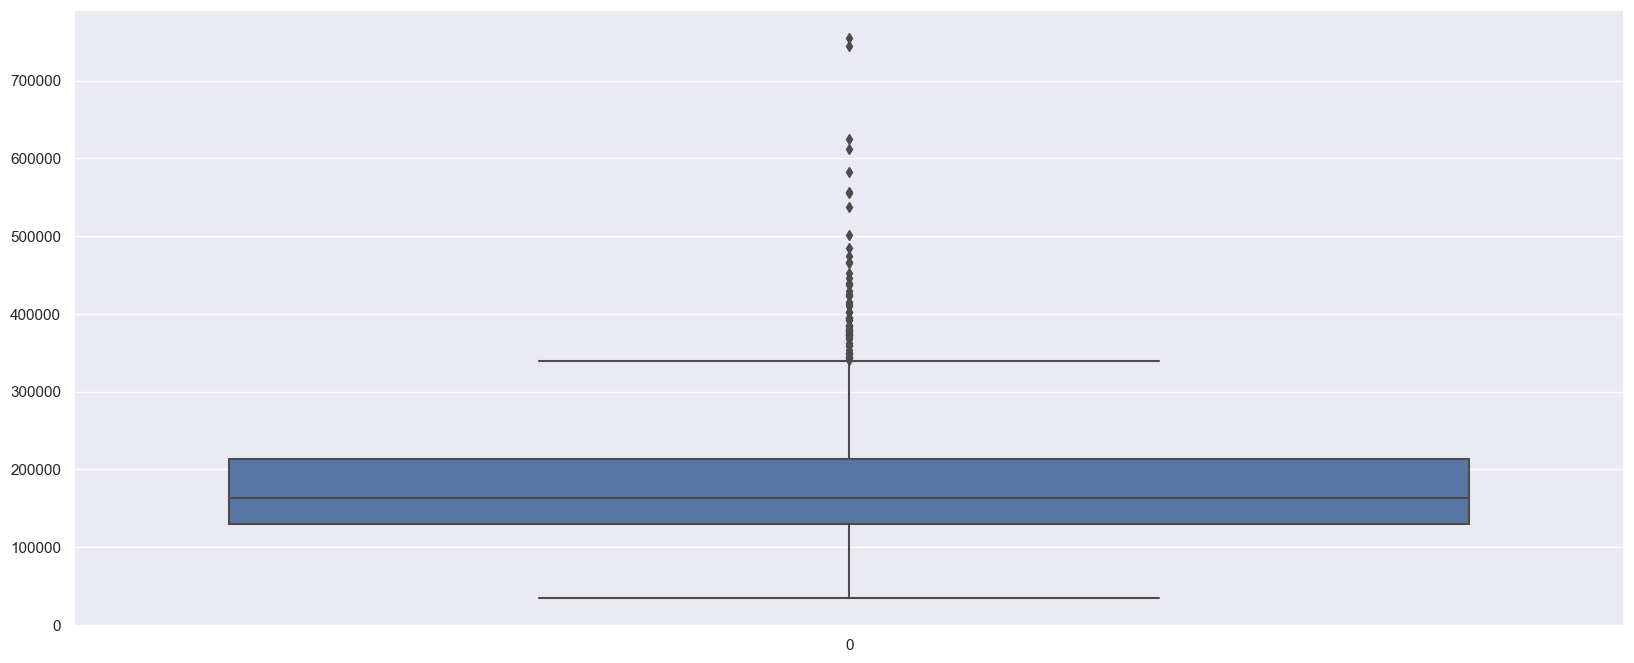

In [71]:
sns.boxplot(df_filter['SalePrice'])

In [72]:
df_filter['SalePrice'].describe().round()

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

### Separando as casas entre barato e caro usando o Q3 do preço

In [73]:
df_filter['categoria_preco'] = np.where(df_filter['SalePrice']>214000, "cara","barata")

/tmp/ipykernel_8492/3912404975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['categoria_preco'] = np.where(df_filter['SalePrice']>214000, "cara","barata")


### Boxplot comparando qualidade com a categoria de preços

Média:  categoria_preco
barata    5.588342
cara      7.649171
Name: OverallQual, dtype: float64
Mediana:  categoria_preco
barata    6.0
cara      8.0
Name: OverallQual, dtype: float64


(array([0, 1]), [Text(0, 0, 'barata'), Text(1, 0, 'cara')])

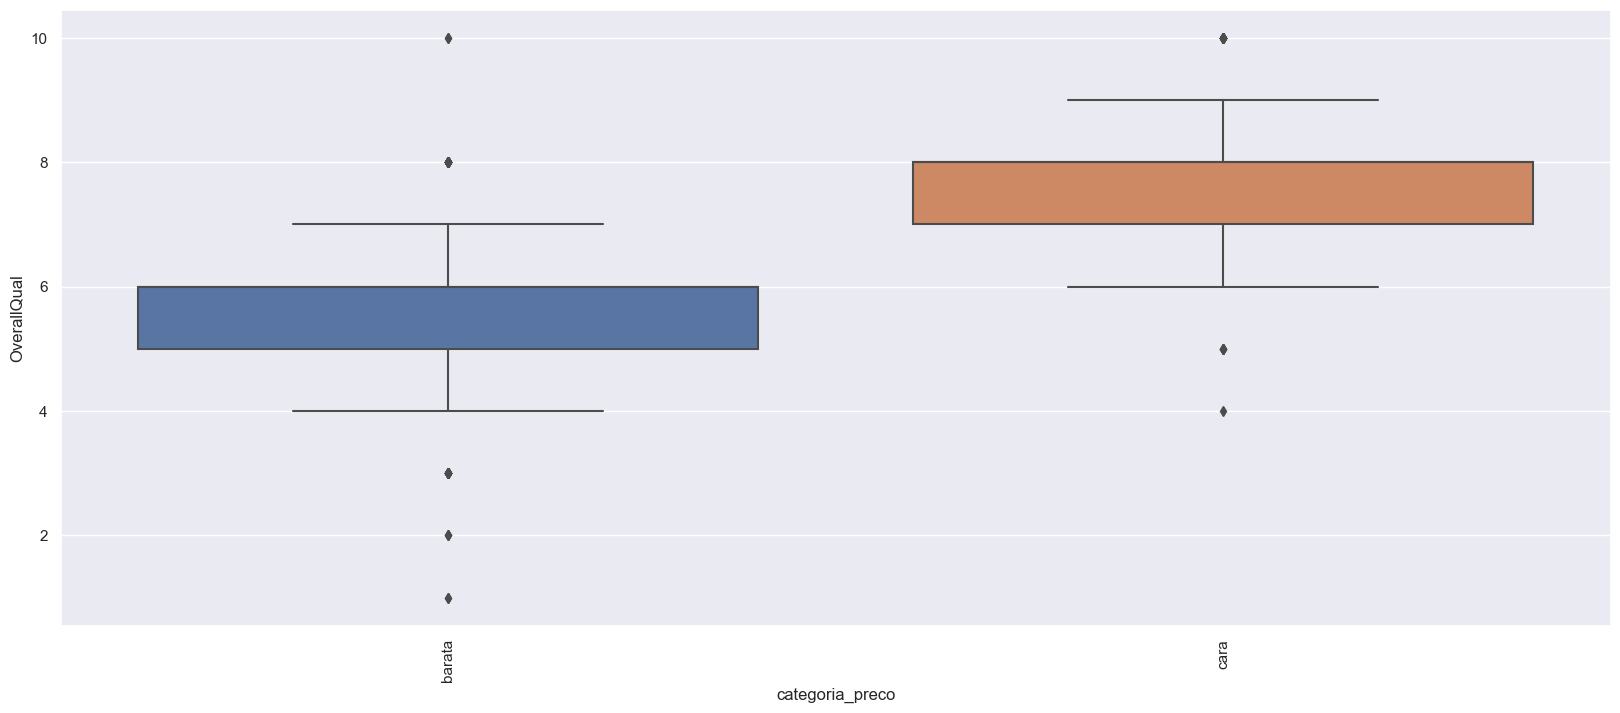

In [74]:
fig = sns.boxplot(x="categoria_preco", y="OverallQual", data=df_filter)
print("Média: ", df_filter.groupby("categoria_preco")["OverallQual"].mean())
print("Mediana: ", df_filter.groupby("categoria_preco")["OverallQual"].median())
plt.xticks(rotation=90)

Média:  categoria_preco
barata    5.631148
cara      5.406077
Name: OverallCond, dtype: float64
Mediana:  categoria_preco
barata    5.0
cara      5.0
Name: OverallCond, dtype: float64


(array([0, 1]), [Text(0, 0, 'barata'), Text(1, 0, 'cara')])

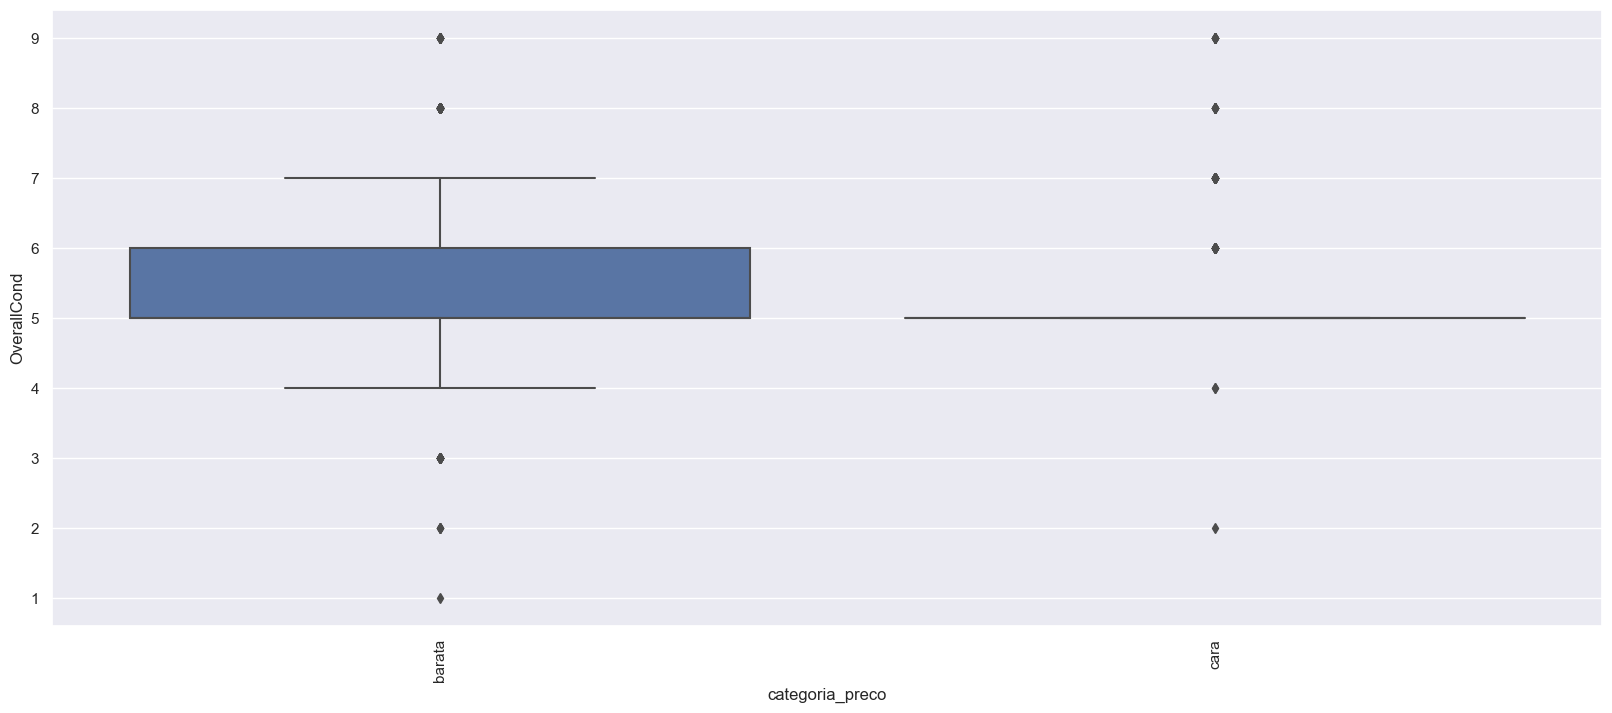

In [44]:
fig = sns.boxplot(x="categoria_preco", y="OverallCond", data=df_filter)
print("Média: ", df_filter.groupby("categoria_preco")["OverallCond"].mean())
print("Mediana: ", df_filter.groupby("categoria_preco")["OverallCond"].median())
plt.xticks(rotation=90)

In [45]:
## Vendo melhor a categoria cara
df_filter[df_filter.categoria_preco == "cara"][['categoria_preco','OverallCond']]

,categoria_preco,OverallCond
2,cara,5
4,cara,5
6,cara,5
11,cara,5
13,cara,5
...,...,...
1437,cara,5
1442,cara,5
1447,cara,5
1451,cara,5


In [46]:
# Me parece que preencheram a qualidade geral da casa de má vontade
df_filter[df_filter.categoria_preco == "cara"].OverallCond.value_counts()

5    284
7     32
6     25
8      9
9      9
4      2
2      1
Name: OverallCond, dtype: int64

Média:  categoria_preco
barata    6.122951
cara      7.715470
Name: TotRmsAbvGrd, dtype: float64
Mediana:  categoria_preco
barata    6.0
cara      8.0
Name: TotRmsAbvGrd, dtype: float64


(array([0, 1]), [Text(0, 0, 'barata'), Text(1, 0, 'cara')])

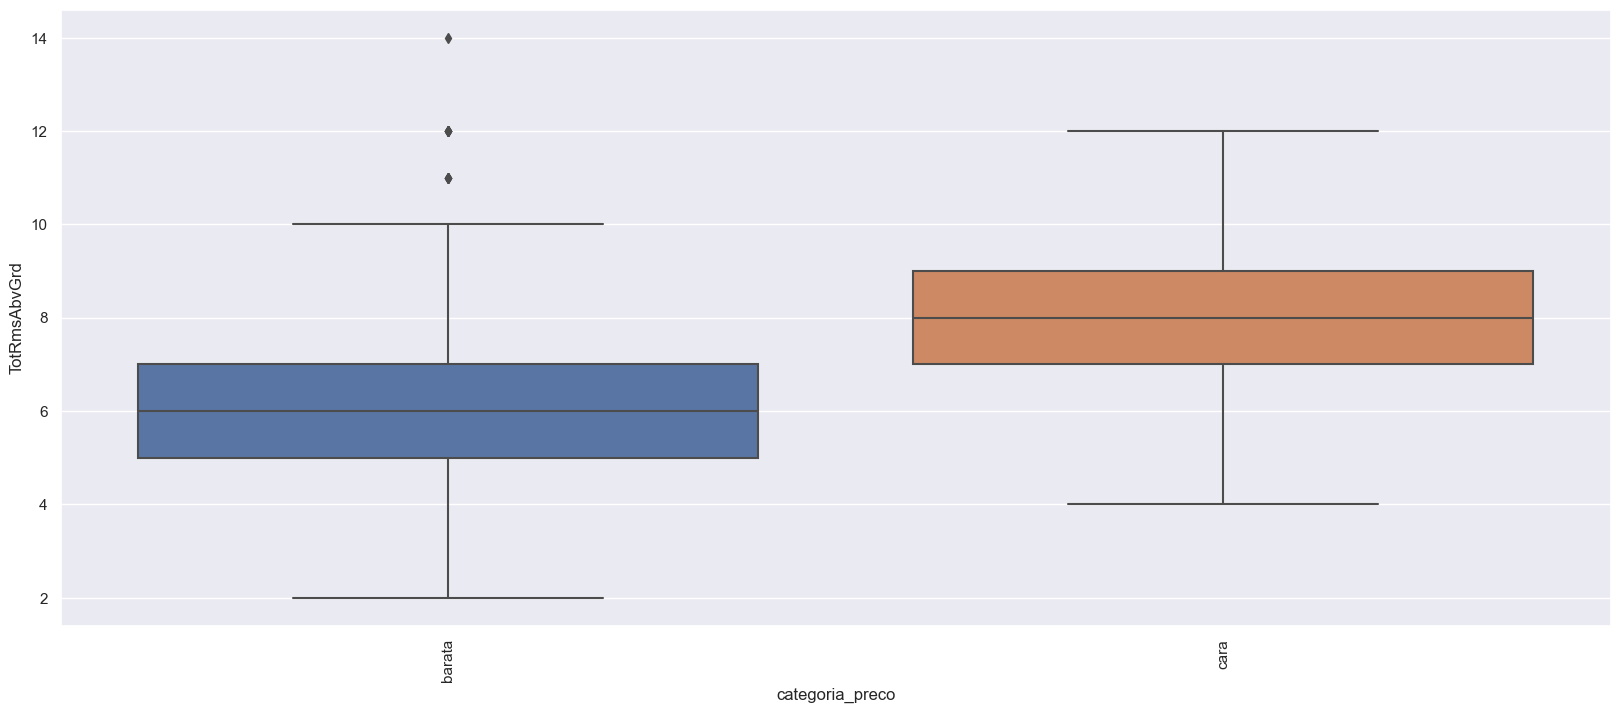

In [47]:
# TotRmsAbvGrd == Total rooms above the ground
fig = sns.boxplot(x="categoria_preco", y="TotRmsAbvGrd", data=df_filter)
print("Média: ", df_filter.groupby("categoria_preco")["TotRmsAbvGrd"].mean())
print("Mediana: ", df_filter.groupby("categoria_preco")["TotRmsAbvGrd"].median())
plt.xticks(rotation=90)

Média:  categoria_preco
barata    1342.642077
cara      2039.657459
Name: GrLivArea, dtype: float64
Mediana:  categoria_preco
barata    1308.5
cara      1956.0
Name: GrLivArea, dtype: float64


(array([0, 1]), [Text(0, 0, 'barata'), Text(1, 0, 'cara')])

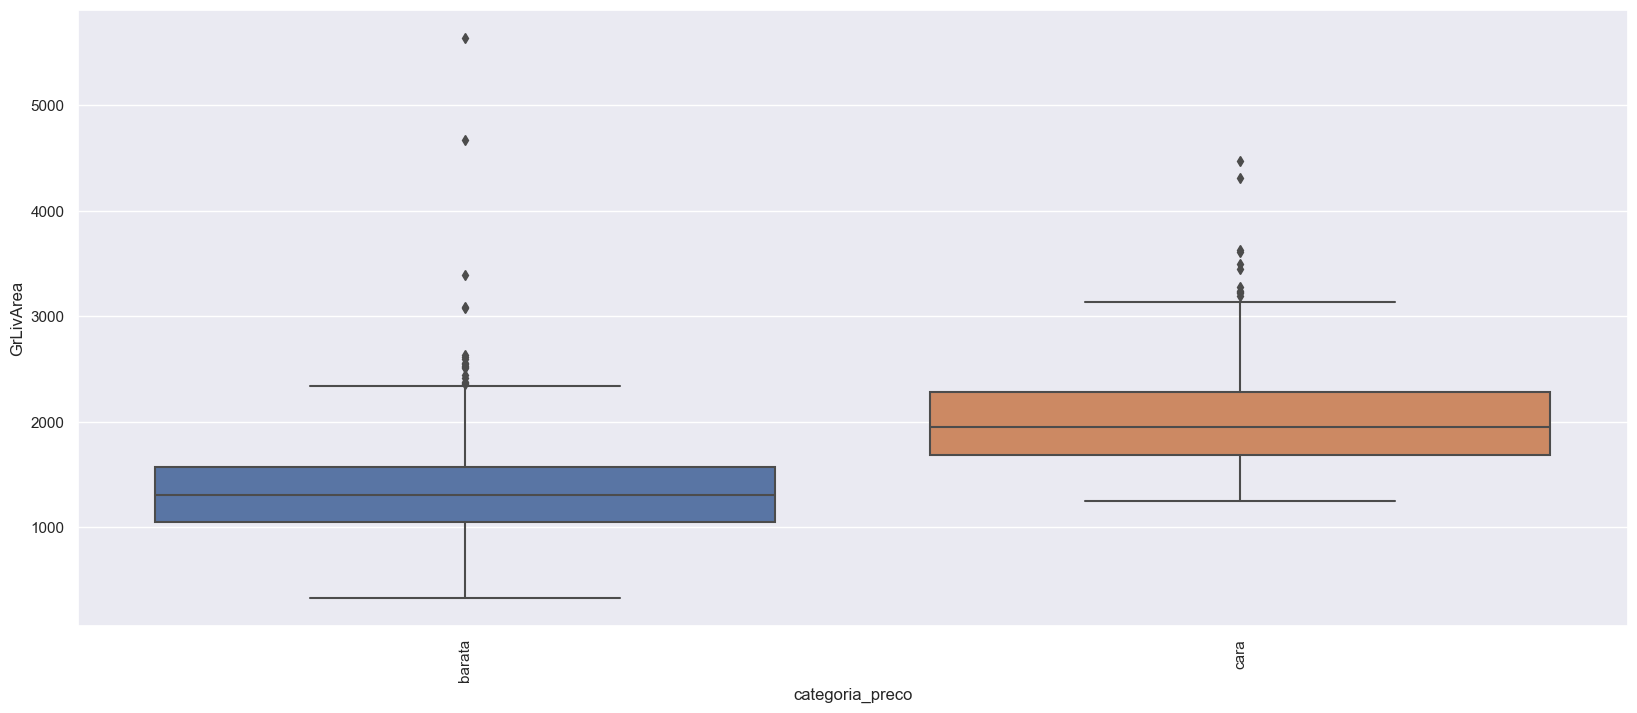

In [48]:
# GrLivArea == Área acima do chão
fig = sns.boxplot(x="categoria_preco", y="GrLivArea", data=df_filter)
print("Média: ", df_filter.groupby("categoria_preco")["GrLivArea"].mean())
print("Mediana: ", df_filter.groupby("categoria_preco")["GrLivArea"].median())
plt.xticks(rotation=90)

Média:  categoria_preco
barata     936.475410
cara      1424.301105
Name: TotalBsmtSF, dtype: float64
Mediana:  categoria_preco
barata     912.0
cara      1452.5
Name: TotalBsmtSF, dtype: float64


(array([0, 1]), [Text(0, 0, 'barata'), Text(1, 0, 'cara')])

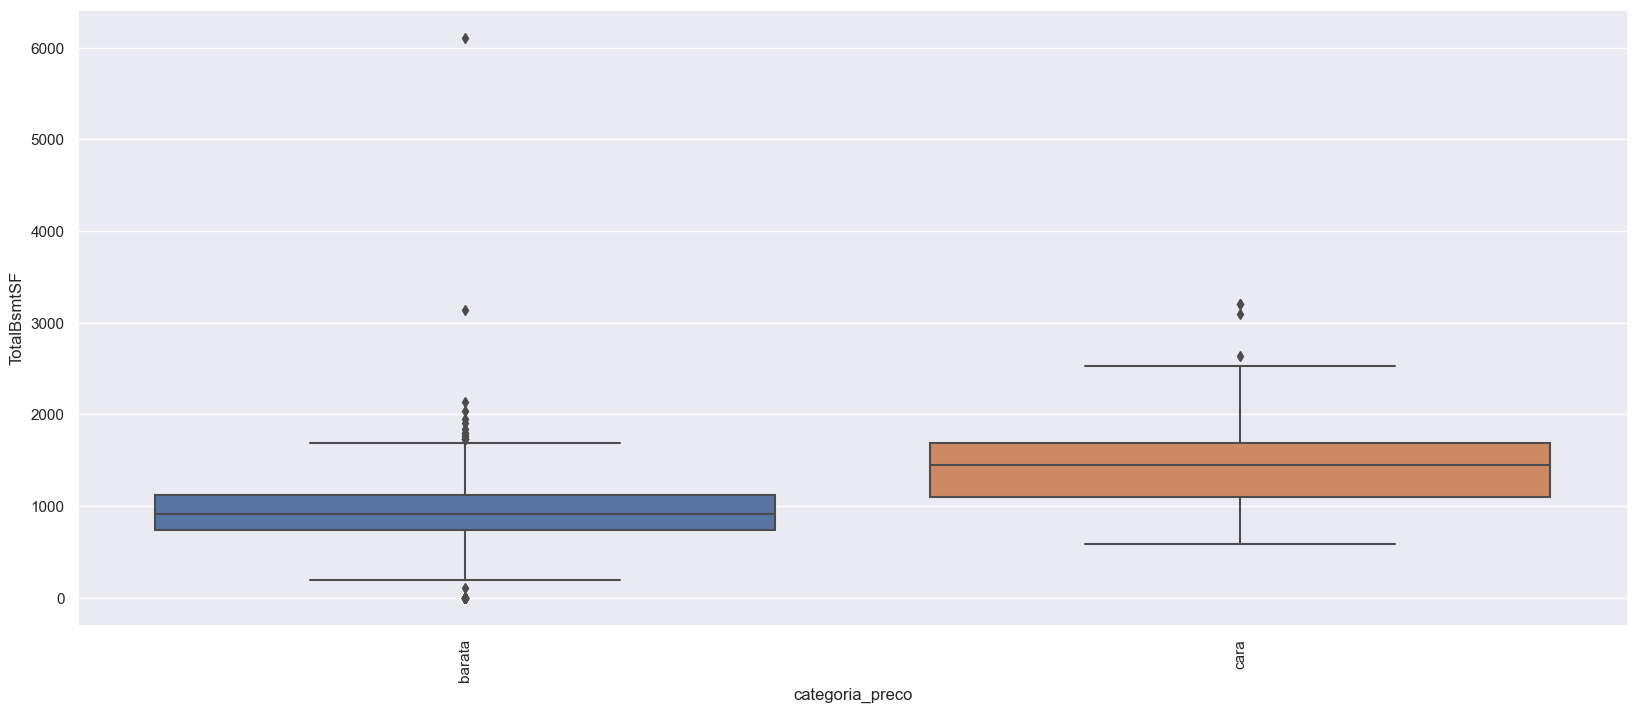

In [49]:
# TotalBsmtSF = Tamanho do porão
fig = sns.boxplot(x="categoria_preco", y="TotalBsmtSF", data=df_filter)
print("Média: ", df_filter.groupby("categoria_preco")["TotalBsmtSF"].mean())
print("Mediana: ", df_filter.groupby("categoria_preco")["TotalBsmtSF"].median())
plt.xticks(rotation=90)

Média:  categoria_preco
barata    1964.303279
cara      1992.392265
Name: YearBuilt, dtype: float64
Mediana:  categoria_preco
barata    1965.5
cara      2002.0
Name: YearBuilt, dtype: float64


(array([0, 1]), [Text(0, 0, 'barata'), Text(1, 0, 'cara')])

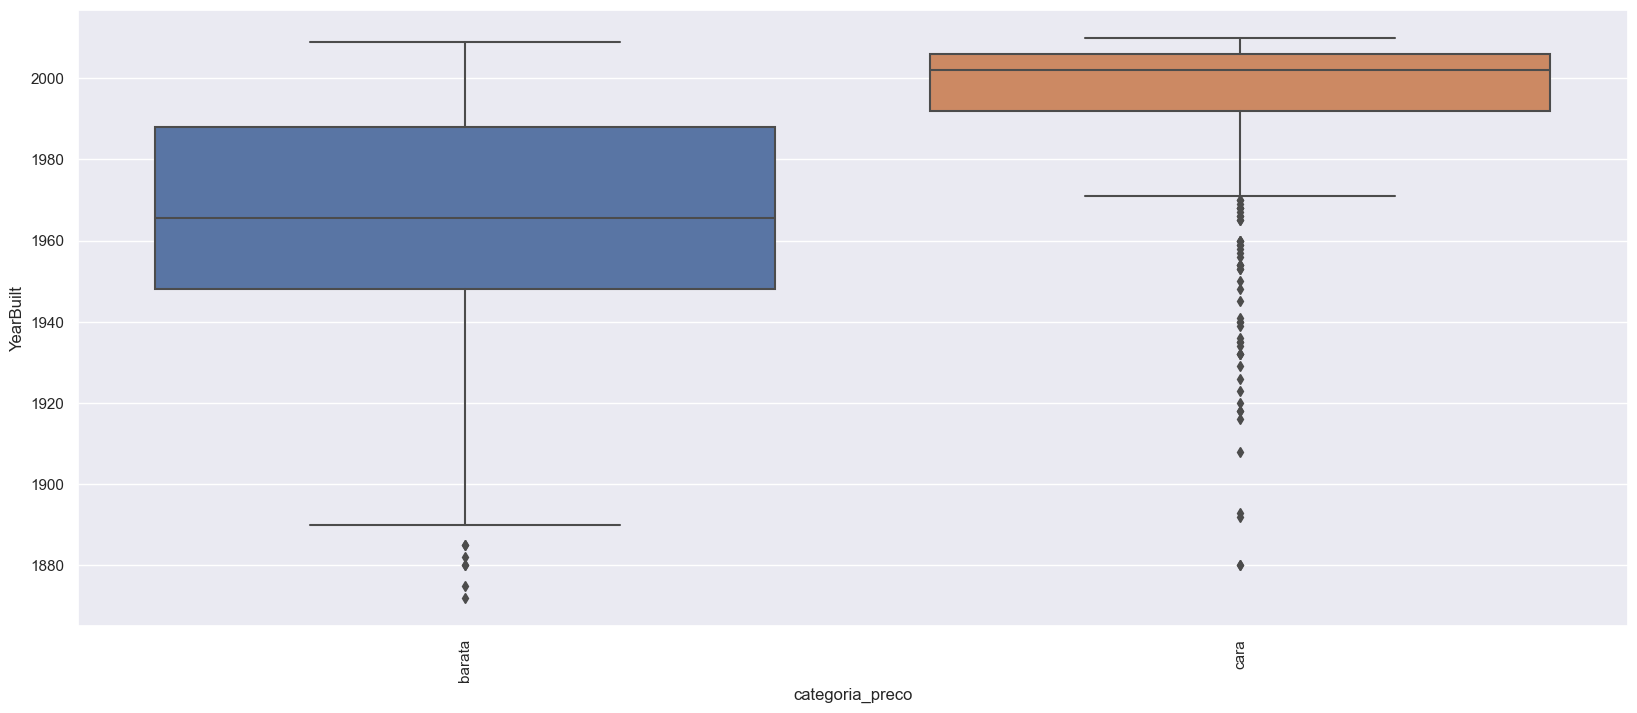

In [50]:
# Ano de ocnstrução
fig = sns.boxplot(x="categoria_preco", y="YearBuilt", data=df_filter)
print("Média: ", df_filter.groupby("categoria_preco")["YearBuilt"].mean())
print("Mediana: ", df_filter.groupby("categoria_preco")["YearBuilt"].median())
plt.xticks(rotation=90)

### Correlações

<AxesSubplot: xlabel='SalePrice', ylabel='OverallQual'>

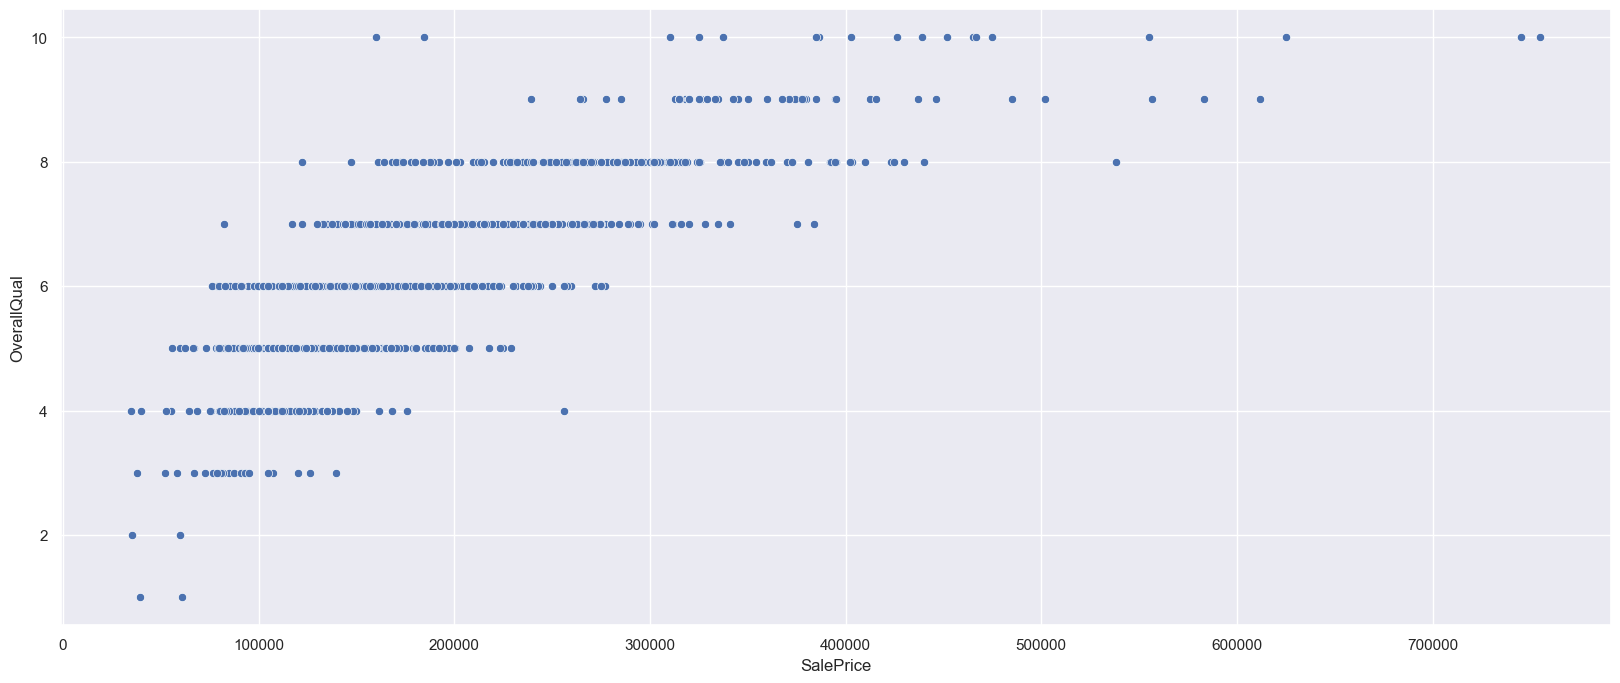

In [51]:
# Qualidade geral - numérico, porém limitado a categorias

sns.scatterplot(x="SalePrice", y="OverallQual", data=df_filter)

<AxesSubplot: xlabel='SalePrice', ylabel='GrLivArea'>

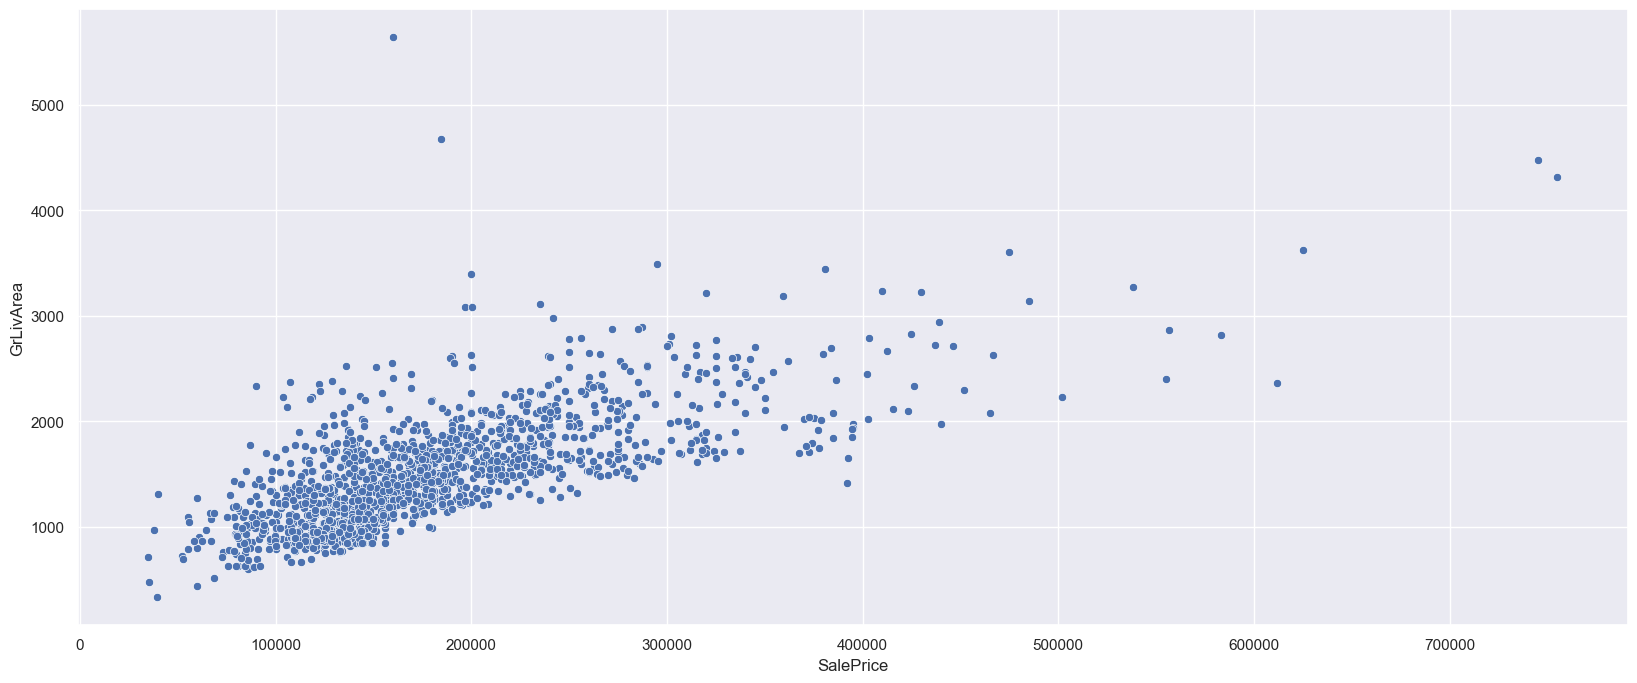

In [52]:
# Área construída

sns.scatterplot(x="SalePrice", y="GrLivArea", data=df_filter)

<AxesSubplot: xlabel='SalePrice', ylabel='YearBuilt'>

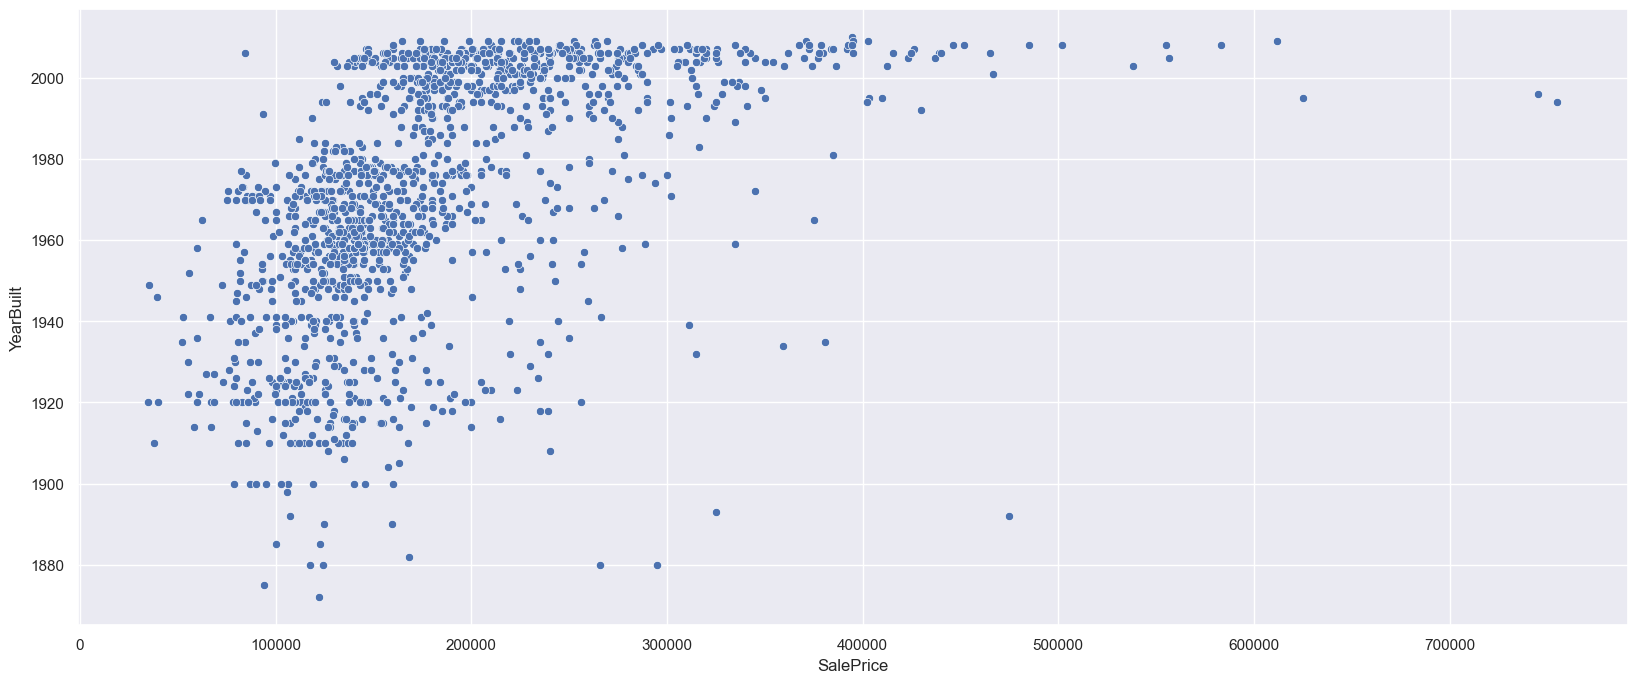

In [53]:
# Ano

sns.scatterplot(x="SalePrice", y="YearBuilt", data=df_filter)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

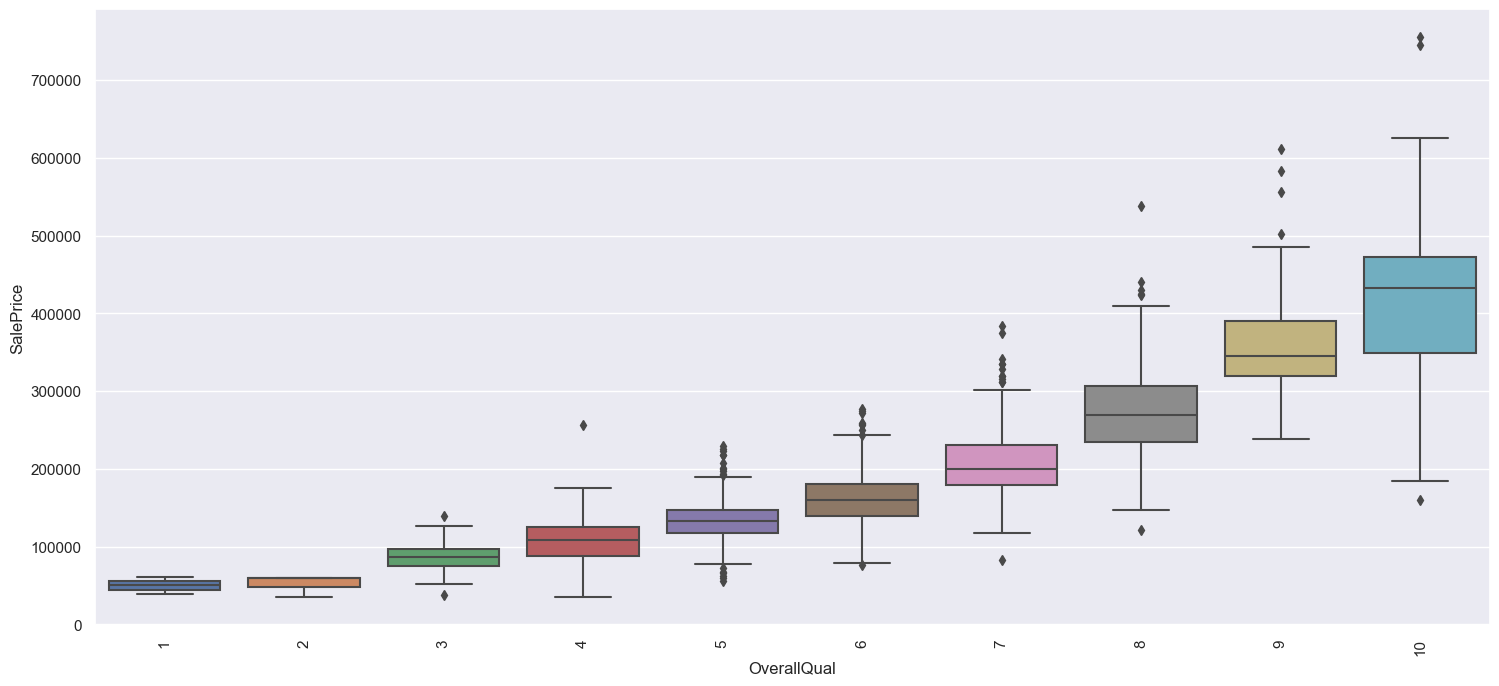

In [54]:
# Qualidade

sns.set(rc = {'figure.figsize':(18,8)})
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=df_filter)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

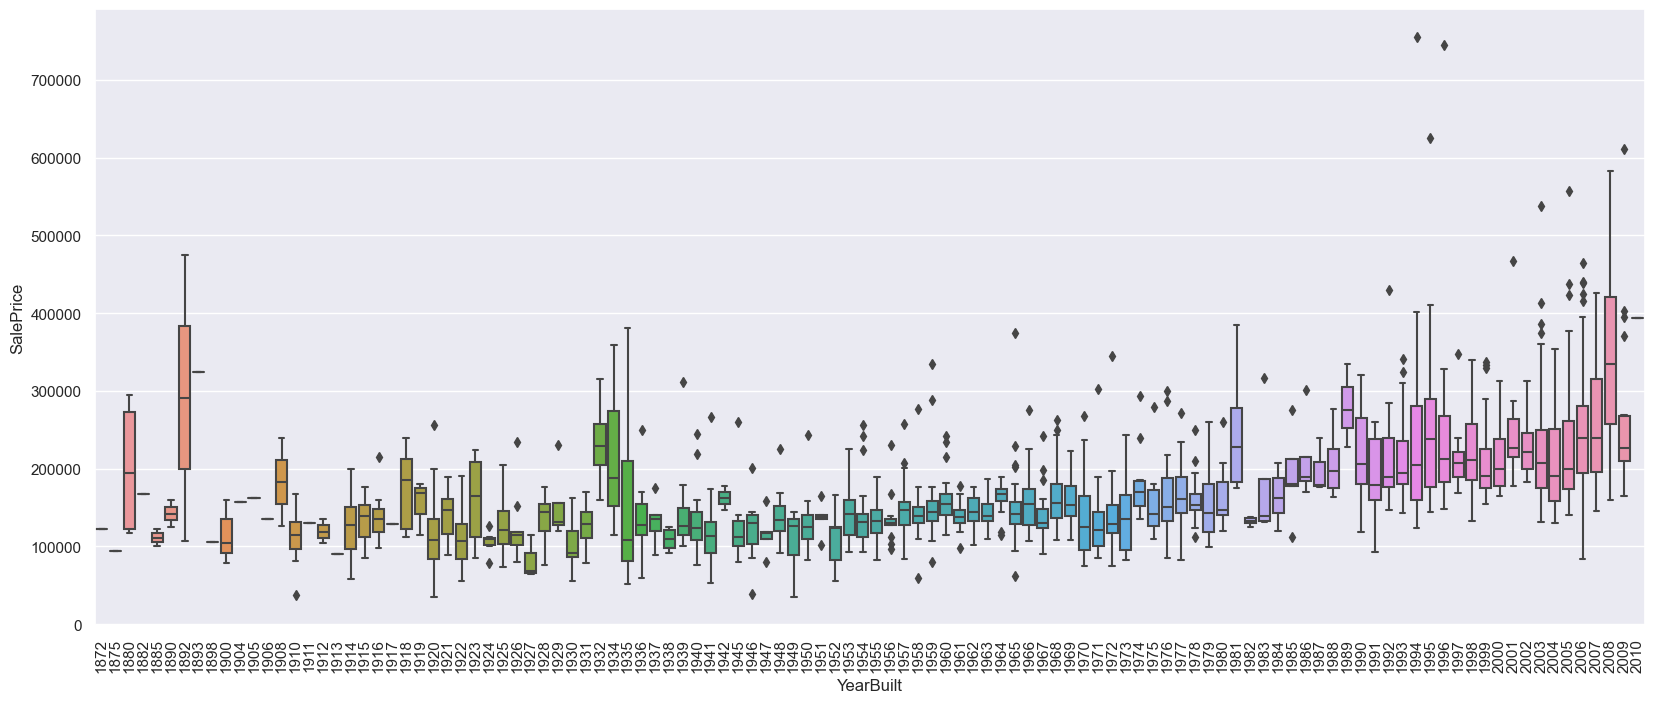

In [56]:
# Ano

sns.set(rc = {'figure.figsize':(20,8)})
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df_filter)
plt.xticks(rotation=90)

#### Categóricas

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RL'),
  Text(1, 0, 'RM'),
  Text(2, 0, 'C (all)'),
  Text(3, 0, 'FV'),
  Text(4, 0, 'RH')])

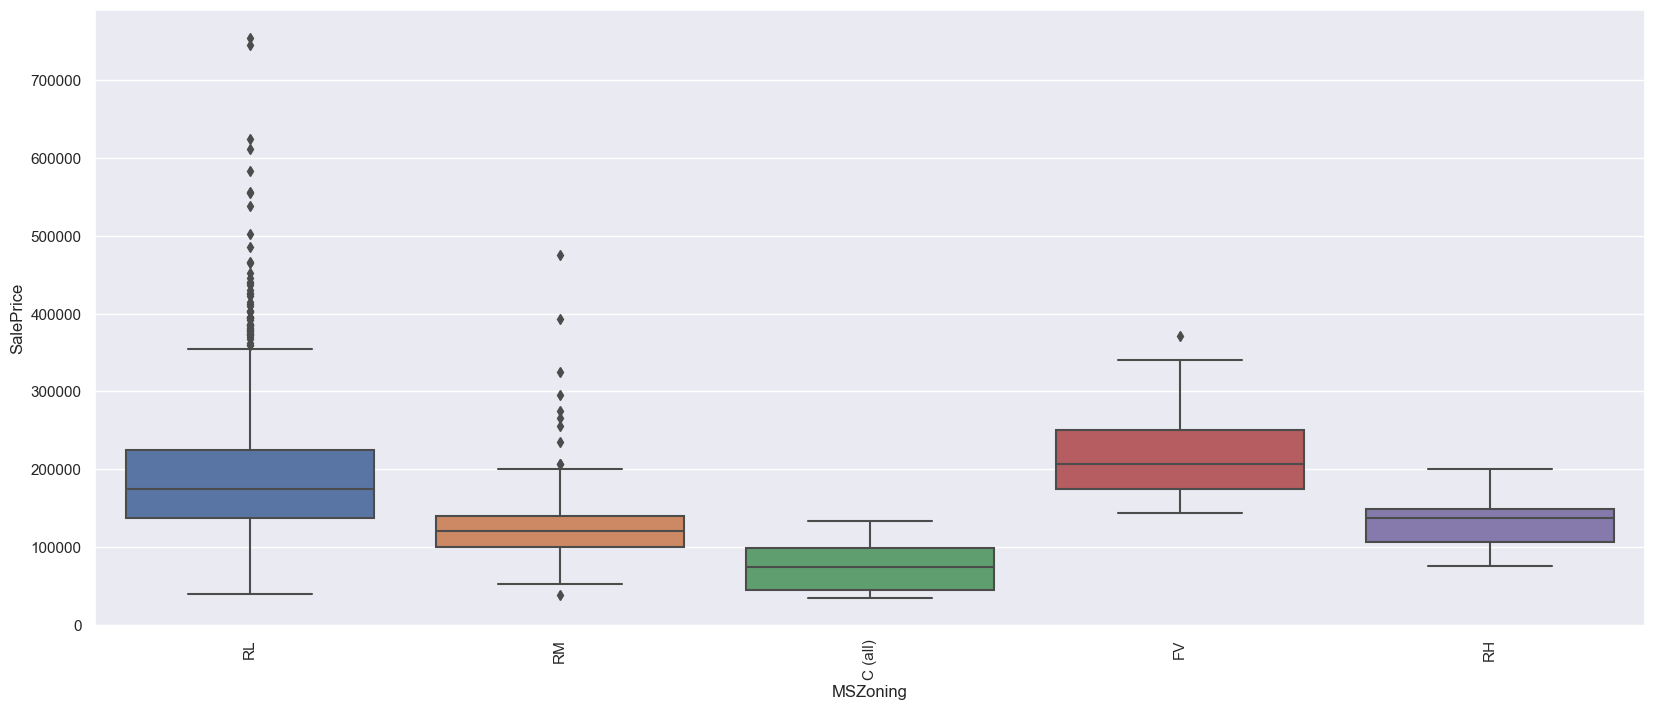

In [57]:
# MsZoning

sns.set(rc = {'figure.figsize':(20,8)})
fig = sns.boxplot(x="MSZoning", y="SalePrice", data=df_filter)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'AllPub'), Text(1, 0, 'NoSeWa')])

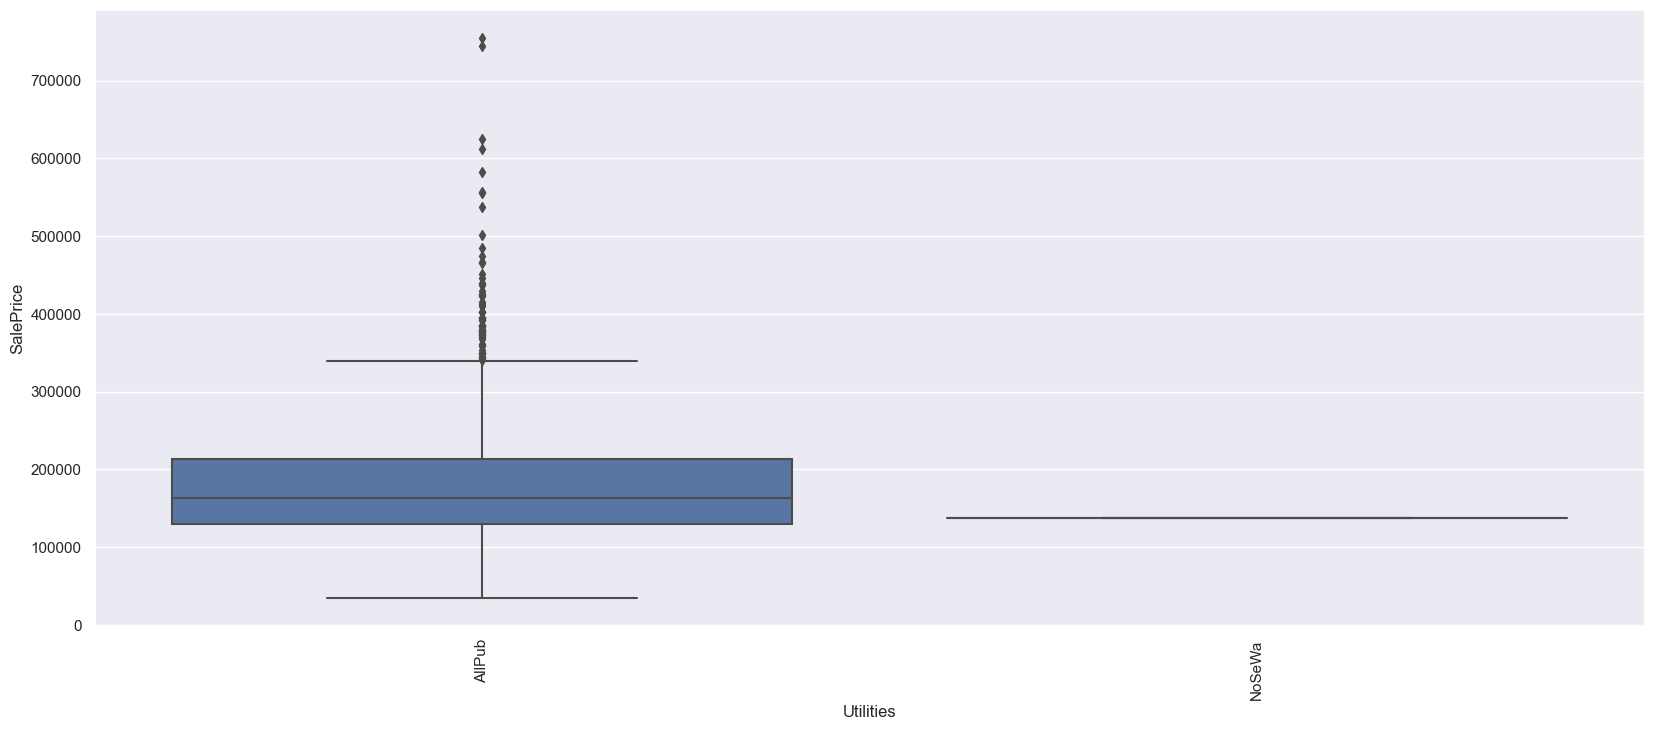

In [58]:
# Utilities

sns.set(rc = {'figure.figsize':(20,8)})
fig = sns.boxplot(x="Utilities", y="SalePrice", data=df_filter)
plt.xticks(rotation=90)

In [59]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1Fam'),
  Text(1, 0, '2fmCon'),
  Text(2, 0, 'Duplex'),
  Text(3, 0, 'TwnhsE'),
  Text(4, 0, 'Twnhs')])

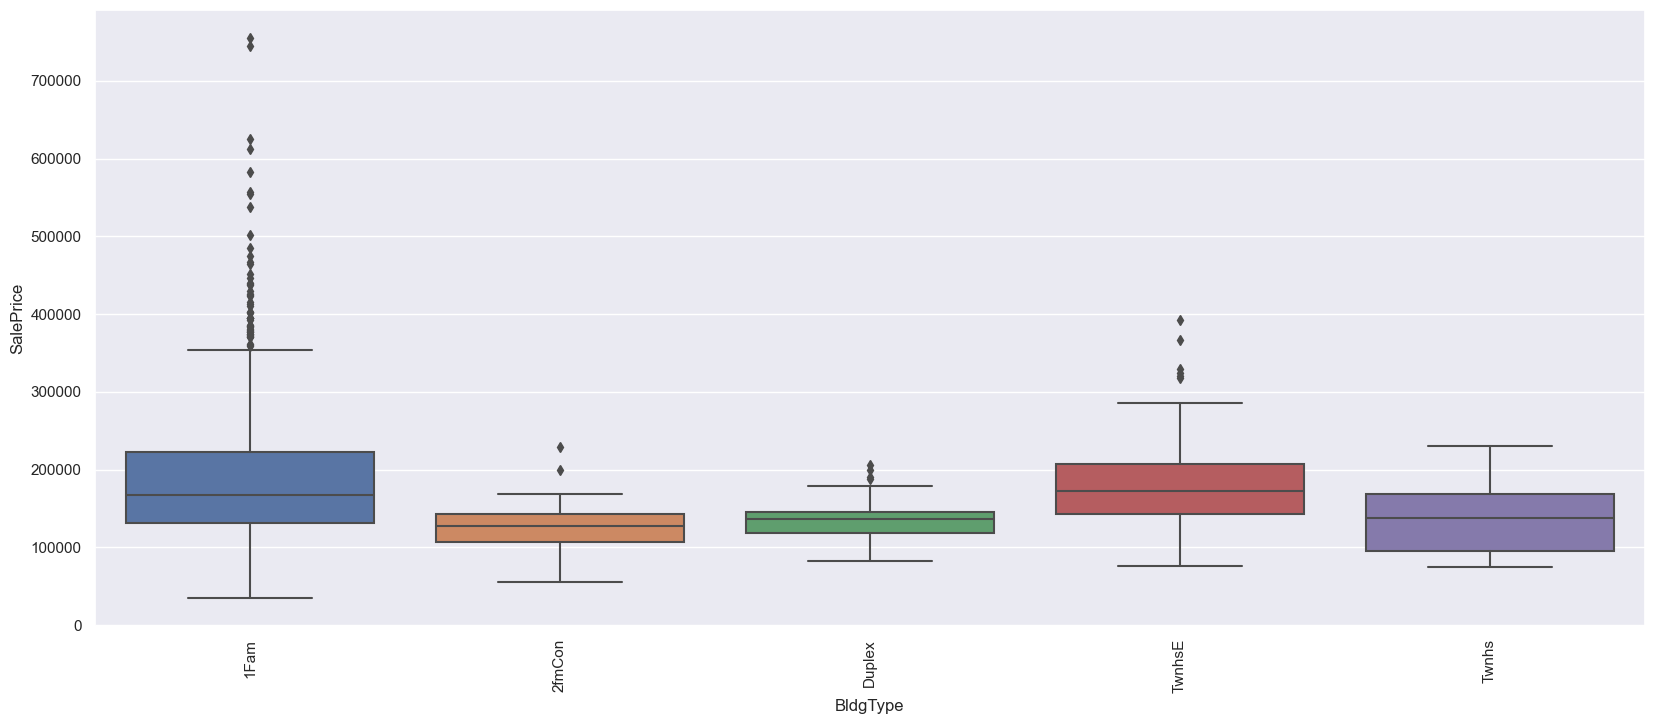

In [61]:
# BldgType

sns.set(rc = {'figure.figsize':(20,8)})
fig = sns.boxplot(x="BldgType", y="SalePrice", data=df_filter)
plt.xticks(rotation=90)